In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.drop('PassengerId', axis=1, inplace=True)

In [4]:
data.shape

(891, 11)

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Cabin has a large number of null values. Hence, we drop the column.

In [7]:
data.drop('Cabin',axis=1,inplace=True)

We will impute mean age for missing values of age.

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

We will impute mode of embarked for missing values

In [9]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

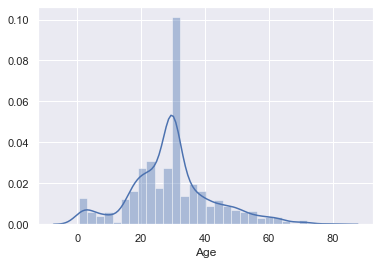

In [11]:
sns.distplot(data['Age']);

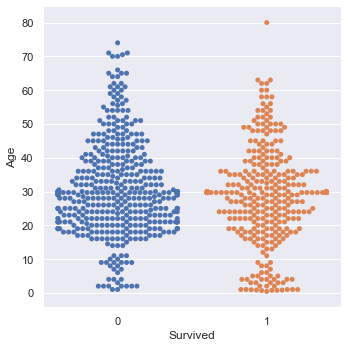

In [12]:
sns.catplot('Survived','Age',kind='swarm',data=data);

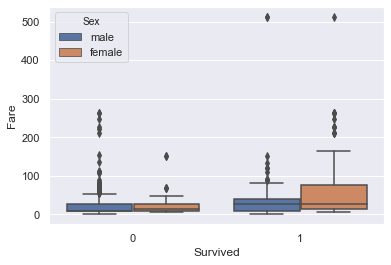

In [13]:
sns.boxplot(data['Survived'],data['Fare'],hue=data['Sex']);

In [14]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})

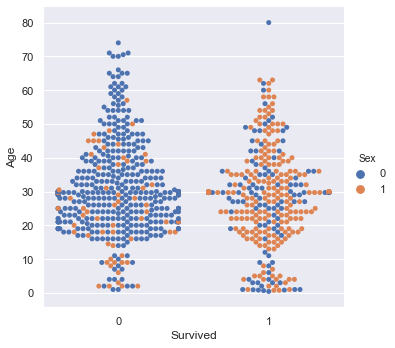

In [15]:
sns.catplot('Survived','Age',kind='swarm',hue='Sex',data=data);

We can see that more number have women have survived than men.

#### Hypothesis: First Class passengers have higher chance at survival than third class passengers.

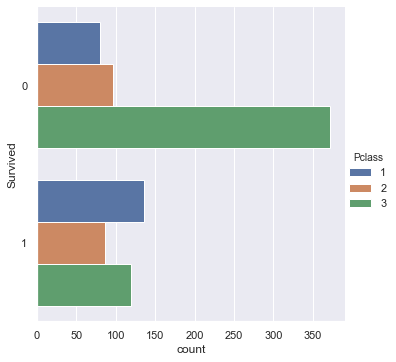

In [16]:
sns.catplot(y='Survived',kind='count',hue='Pclass',data=data);

We can see that our hypothesis is true.

In [17]:
data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [18]:
data.drop('Ticket', axis=1, inplace=True)

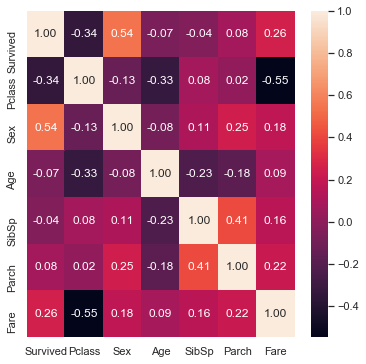

In [19]:
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(data.corr(),annot=True,fmt='.2f',ax=ax);

In [20]:
data.drop('Name', axis=1,inplace=True)

In [21]:
data.shape

(891, 8)

In [22]:

#d = data['Name']

#comma=[]
#for i in range(0,len(d)):
#    comma.append(d.str.split(',')[i][1])
    
#comma1 = pd.Series(comma)
#title=[]
#for i in range(0,len(d)):
#    title.append(comma1.str.split('.')[i][0])
    
#data['Title'] = title
#data.drop('Name', axis=1, inplace=True)


In [23]:
data['Embarked'] = data['Embarked'].map({'S':1,'C':2,'Q':3})

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


## Model

In [25]:
X = data.drop('Survived', axis=1)
y = data.Survived

In [26]:
X.shape

(891, 7)

In [27]:
import xgboost as xgb

classifier = xgb.XGBClassifier()

In [28]:
hyperparameters = {
     'n_estimators' : [10,100,500,900,1100],
     'learning_rate' : [0.05,0.01,0.1,0.15,0.2],
     'max_depth' : [1,3,5,10,15],
     'booster' : ['gbtree','gblinear']
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

random_CV = RandomizedSearchCV(estimator=classifier,
                               param_distributions=hyperparameters,
                               n_iter=50,
                               verbose=5,
                               n_jobs=4,
                               cv=4,
                               random_state=0)

In [30]:
random_CV.fit(X,y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   16.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   25.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   41.8s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...s_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depre

In [31]:
random_CV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
test_data = pd.read_csv('Test_Data.csv')

In [35]:
test_data.shape

(418, 7)

In [36]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


In [37]:
y_pred = model.predict(test_data)

In [38]:
pred = pd.DataFrame(y_pred)

In [39]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
submit = pd.concat([submission['PassengerId'],pred],axis=1)
submit.columns = ['PassengerId','Survived']
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [41]:
submit.shape

(418, 2)

In [42]:
submit['Survived'].unique()

array([0, 1], dtype=int64)

In [43]:
#submit.to_csv('Submit.csv', index=None)

In [44]:
from sklearn.metrics import roc_auc_score

print('Training Accuracy: ',roc_auc_score(y,model.predict(X)))

Training Accuracy:  0.8487680951011408


Testing Score (Kaggle): 0.77751

## Using Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [46]:
hyperparameters_rf = {
    'n_estimators':[10,100,500,900,1100],
    'max_depth': [1,3,4,5,10,15],
    'min_samples_leaf': [1,2,3,5]
}

In [47]:
random_CV_rf = RandomizedSearchCV(estimator=rfc,
                               param_distributions=hyperparameters_rf,
                               n_iter=50,
                               verbose=5,
                               n_jobs=4,
                               cv=4,
                               random_state=0)

In [48]:
random_CV_rf.fit(X,y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   48.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  2.2min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
random_CV_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
print('Training Accuracy: ',roc_auc_score(y,rfc.predict(X)))

Training Accuracy:  0.9274757933084076


In [54]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


In [55]:
y_pred_rfc = rfc.predict(test_data)

In [56]:
pred_rfc = pd.DataFrame(y_pred_rfc)

In [57]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [59]:
submit_rfc = pd.concat([submission['PassengerId'],pred_rfc],axis=1)
submit_rfc.columns = ['PassengerId','Survived']

In [60]:
submit_rfc.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [61]:
submit_rfc.to_csv('Submit_using_RFC.csv',index=None)

Testing Score (Kaggle): 0.76076

## Using GridSearch on XGBoost

In [62]:
from sklearn.model_selection import GridSearchCV

grid_CV = RandomizedSearchCV(estimator=classifier,
                               param_distributions=hyperparameters,
                               n_iter=50,
                               verbose=5,
                               n_jobs=4,
                               cv=4,
                               random_state=0)

In [63]:
grid_CV.fit(X,y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 193 out of 200 | elapsed:   14.6s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   17.8s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...s_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depre

In [64]:
grid_CV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

GridSearchCV gives the same best_estimator_ as RandomizedSearchCV